# Convert outputs

In [1]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

In [2]:
path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp'

In [3]:
!ls {path}

actlyrmax_monthly.nc	   ftablemin_monthly.nc      pr_monthly.nc
actlyrmin_monthly.nc	   ftable_monthly.nc	     ra_monthly.nc
actlyr_monthly.nc	   fVegLitter_monthly.nc     rh_monthly.nc
albs_monthly.nc		   gpp_monthly.nc	     rls_monthly.nc
albsn_monthly.nc	   hfg_monthly.nc	     rsds_monthly.nc
cLeaf_monthly.nc	   hfls_monthly.nc	     rSoil_monthly.nc
cRoot_monthly.nc	   hfss_monthly.nc	     rss_monthly.nc
cSoil_monthly.nc	   lai_monthly.nc	     sftlf.nc
cStem_monthly.nc	   landCoverFrac_monthly.nc  snc_monthly.nc
cVeg_monthly.nc		   mrrob_monthly.nc	     snd_monthly.nc
evspsbl_monthly.nc	   mrro_monthly.nc	     snw_monthly.nc
evspsblsoi_monthly.nc	   mrros_monthly.nc	     tas_monthly.nc
evspsblveg_monthly.nc	   mrsfl_monthly.nc	     tcs_monthly.nc
fLeafLitter_monthly.nc	   mrsll_monthly.nc	     tran_monthly.nc
fLitterSoil_monthly.nc	   mrsol_monthly.nc	     tsl_monthly.nc
fProductDecomp_monthly.nc  mrso_monthly.nc	     ts_monthly.nc
fRootLitter_monthly.nc	   nbp_monthly.nc	     vcmax

As we generally start the C pools, etc. from zero it takes several runs to spin up sites. Especially the high-latitude sites tend to be slower to spin up. To check whether the model is spun up, we usually look at the outputs for NBP, soil C, etc. to see whether they’re relatively stable or close to zero for NBP averaged over several years. An easy check is to look at the ratio of NEP/NPP. We usually say that a site is spun up, if the absolute value of NEP/NPP is less than 0.02.

In [4]:
tas = xr.open_dataset(path+'/tas_monthly.nc').tas
snd = xr.open_dataset(path+'/snd_monthly.nc').snd
snw = xr.open_dataset(path+'/snw_monthly.nc').snw
nep = xr.open_dataset(path+'/nep_monthly.nc').nep
npp = xr.open_dataset(path+'/npp_monthly.nc').npp

tas

<xarray.DataArray 'tas' (time: 228, lat: 1, lon: 1)>
array([[[269.746431]],

       [[274.189395]],

       ...,

       [[273.228686]],

       [[274.521867]]])
Coordinates:
  * time     (time) datetime64[ns] 1995-01-31 1995-02-28 ... 2013-12-31
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Near-surface air temperature at reference height
    units:       K
    nameInCode:  taacc_mo

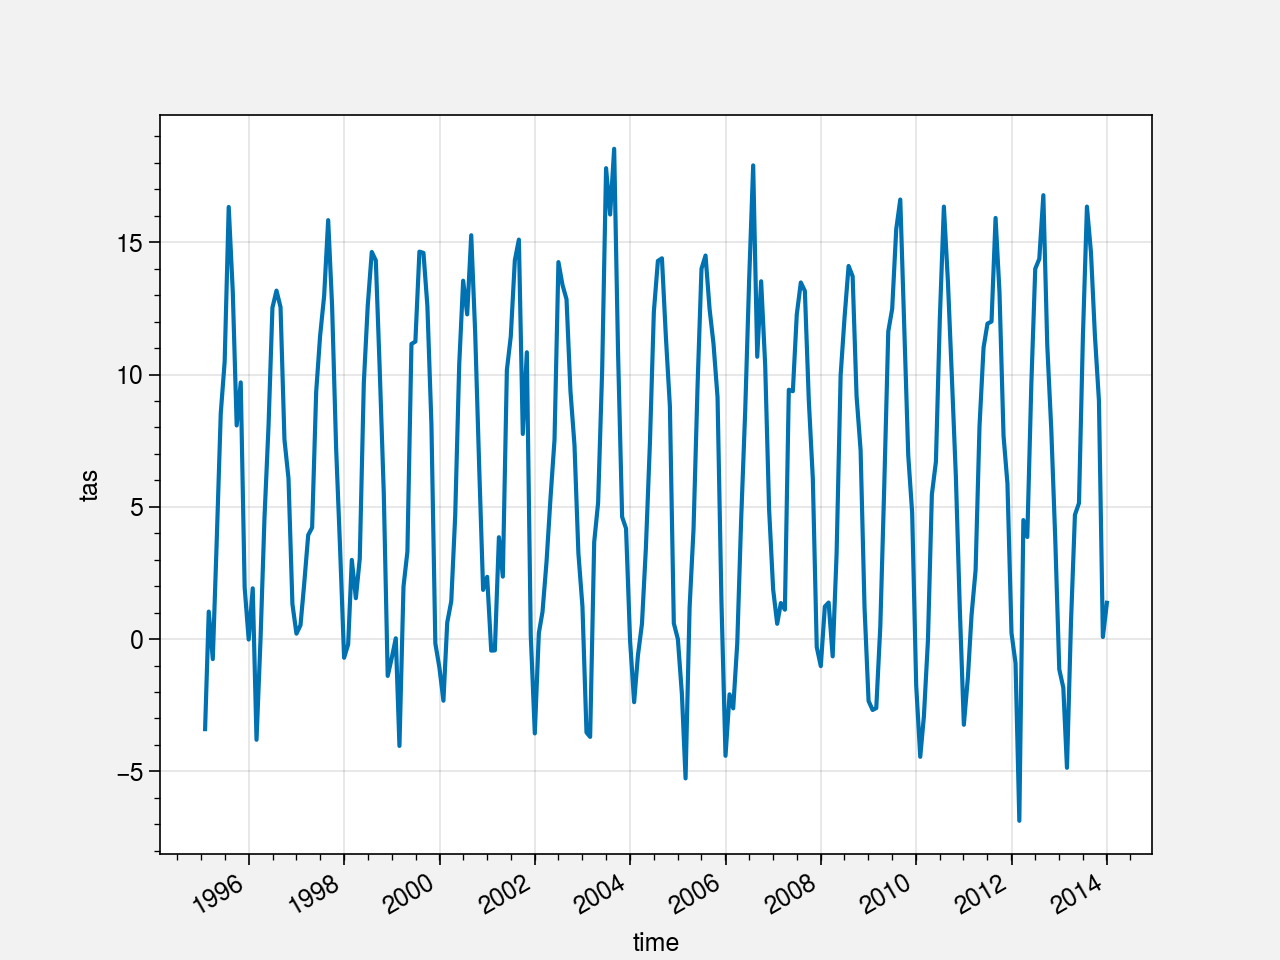

In [5]:
(tas-273.15).plot()

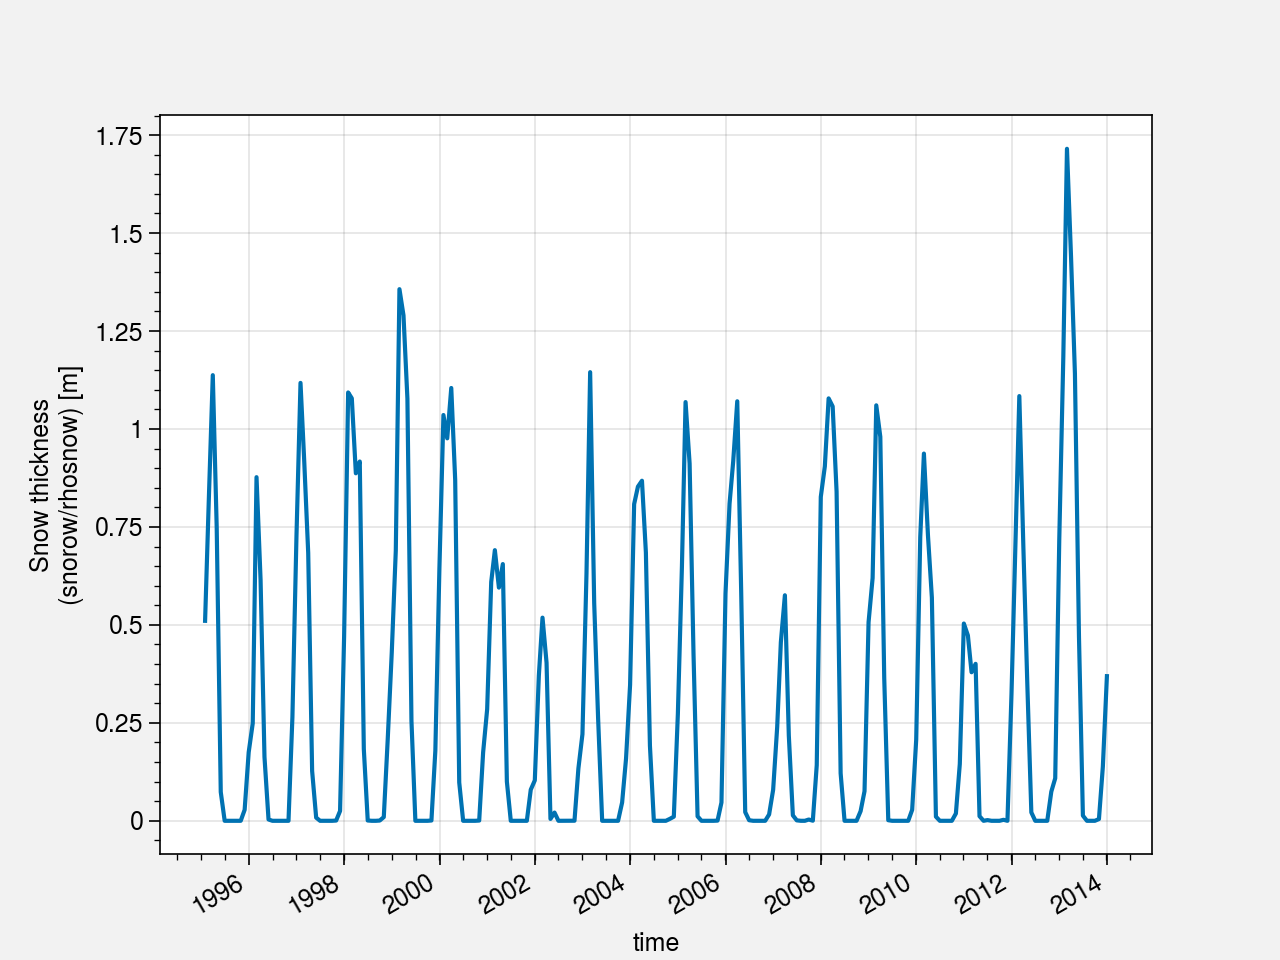

In [6]:
snd.plot()

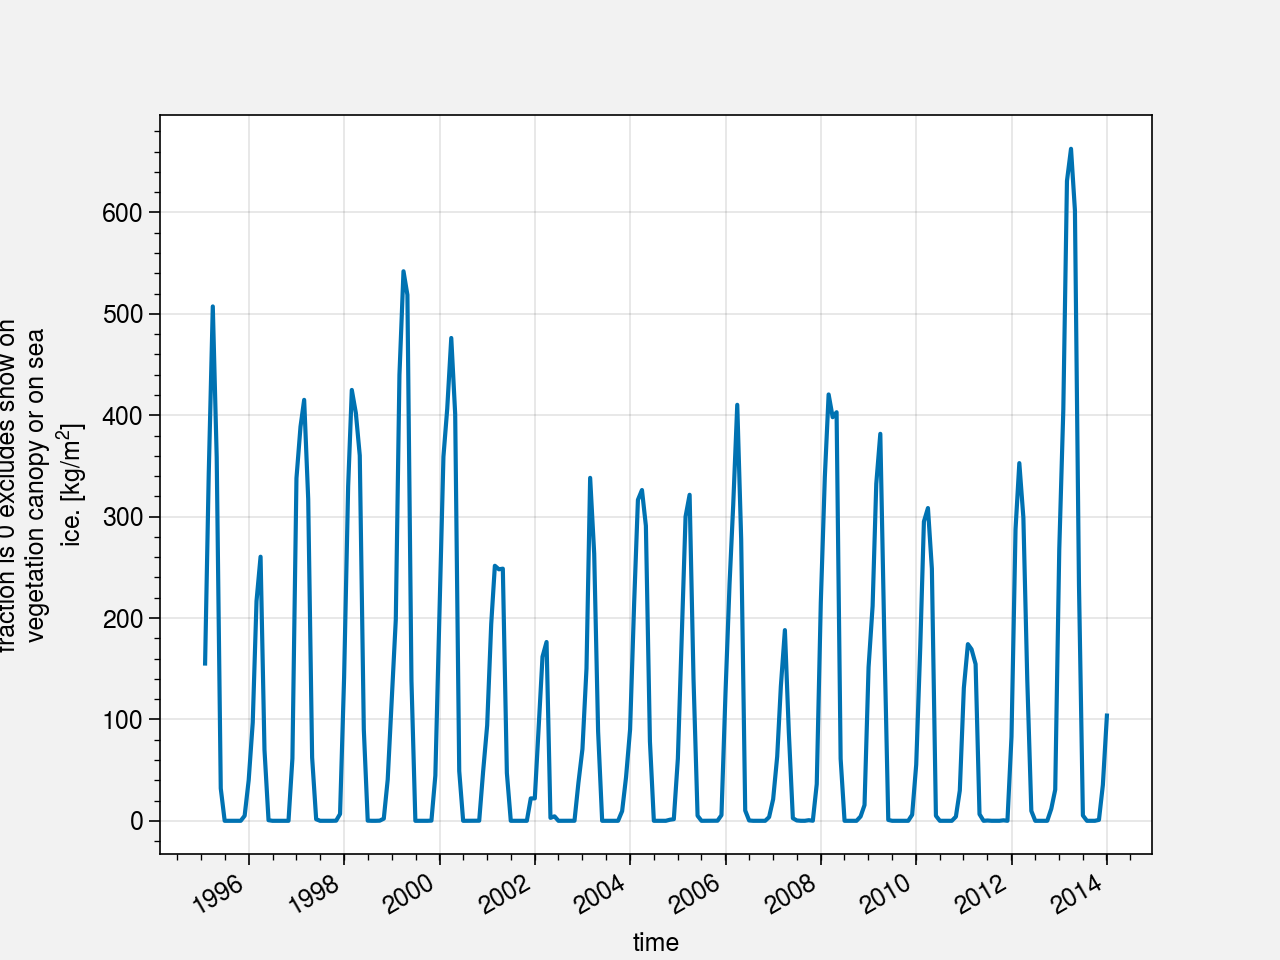

In [7]:
snw.plot()

## Check the carbon fluxes

In [8]:
nep

<xarray.DataArray 'nep' (time: 228, lat: 1, lon: 1)>
array([[[-4.505682e-09]],

       [[-2.322387e-09]],

       ...,

       [[-7.362952e-09]],

       [[-7.099762e-09]]])
Coordinates:
  * time     (time) datetime64[ns] 1995-01-31 1995-02-28 ... 2013-12-31
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Natural flux of CO2 (expressed as a mass flux of carbon) fro...
    units:       kg m$^{-2}$ s$^{-1}$
    nameInCode:  nep_mo_g

In [9]:
npp

<xarray.DataArray 'npp' (time: 228, lat: 1, lon: 1)>
array([[[-4.076452e-09]],

       [[-1.317363e-09]],

       ...,

       [[ 1.527903e-10]],

       [[-5.229363e-10]]])
Coordinates:
  * time     (time) datetime64[ns] 1995-01-31 1995-02-28 ... 2013-12-31
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Carbon Mass Flux out of Atmosphere due to Net Primary Produc...
    units:       kg m$^{-2}$ s$^{-1}$
    nameInCode:  npp_mo_g

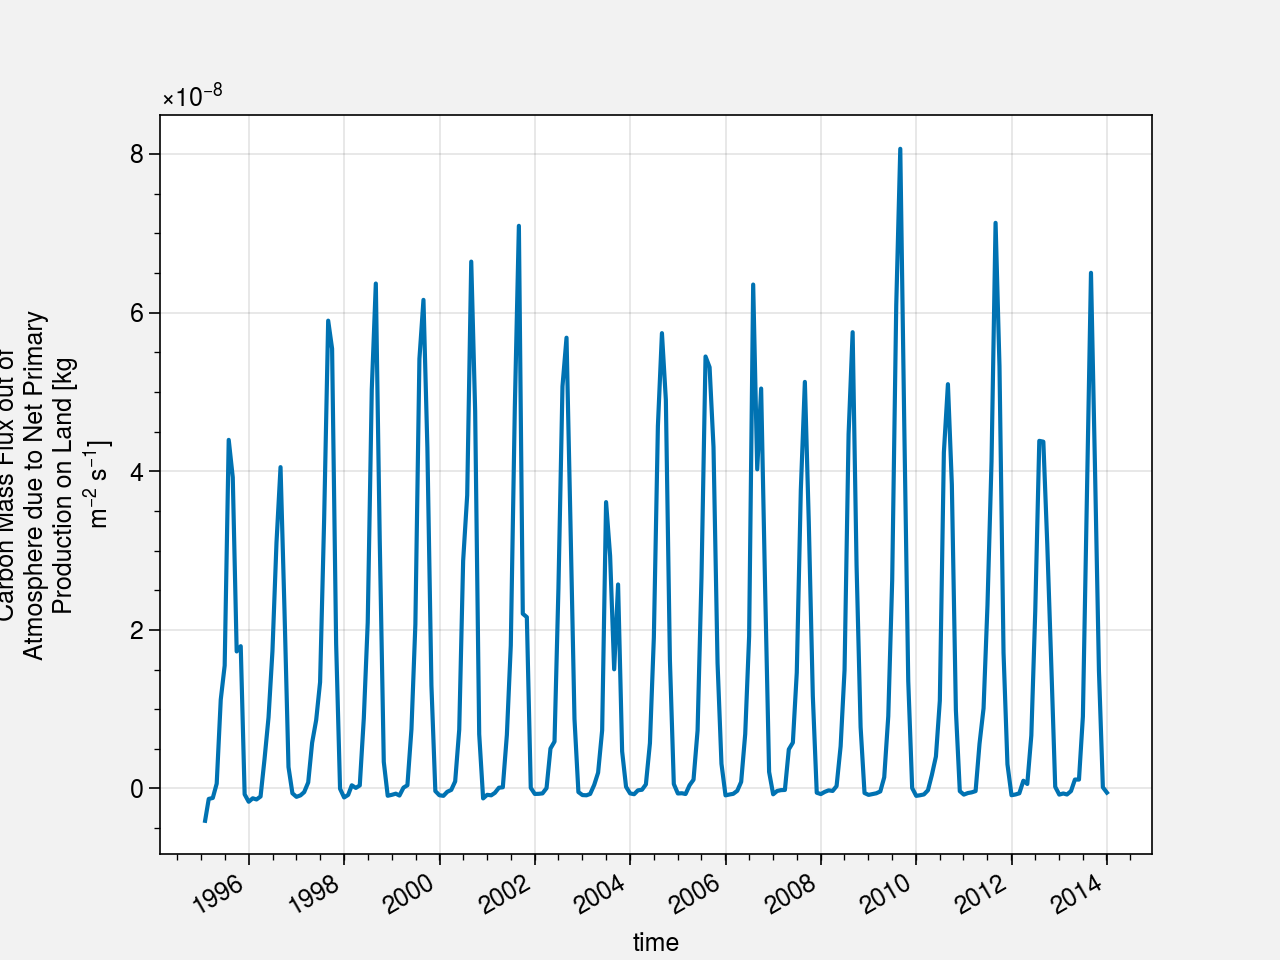

In [10]:
npp.plot()

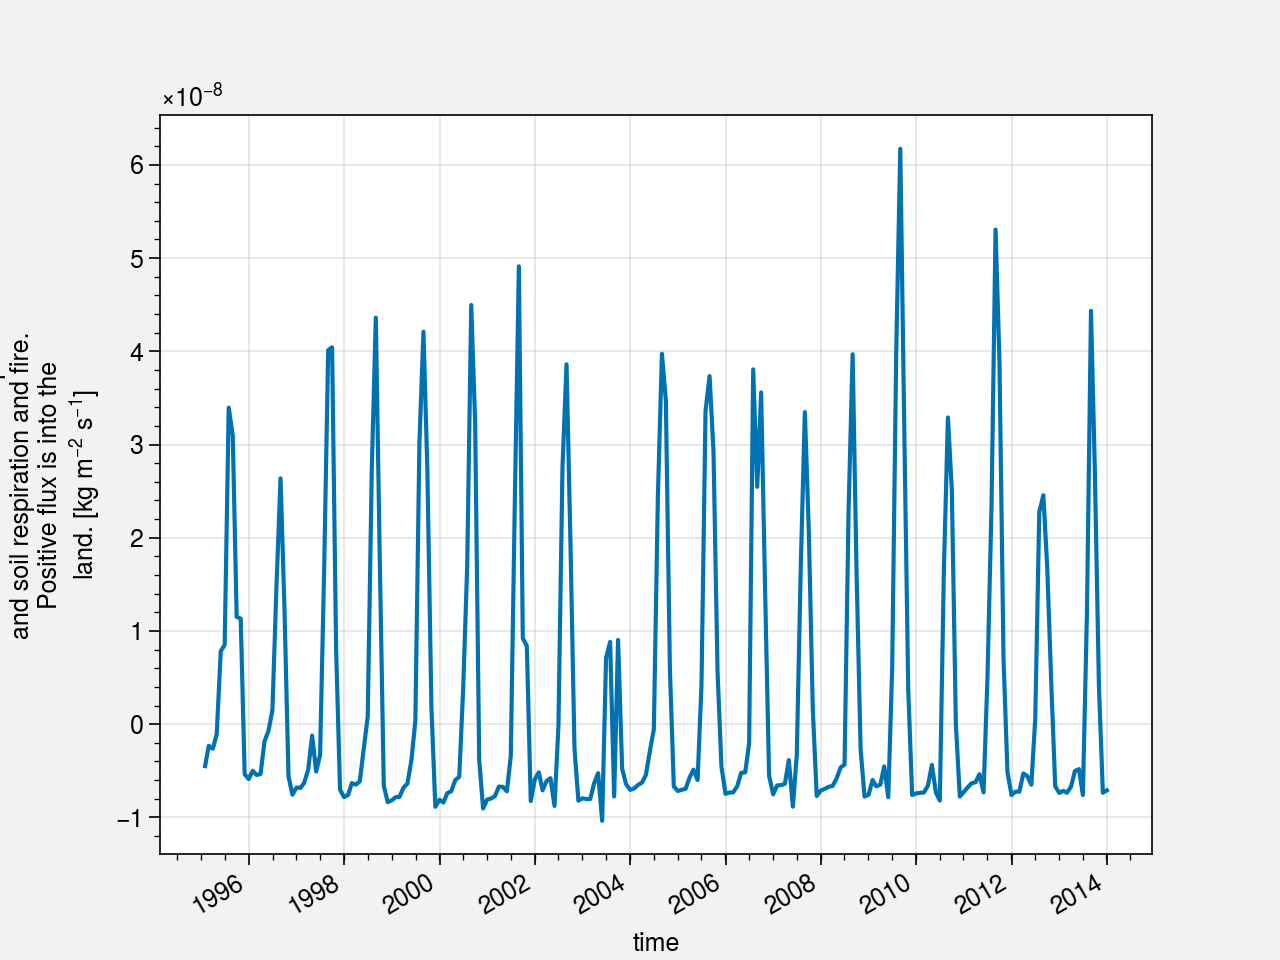

In [11]:
nep.plot()

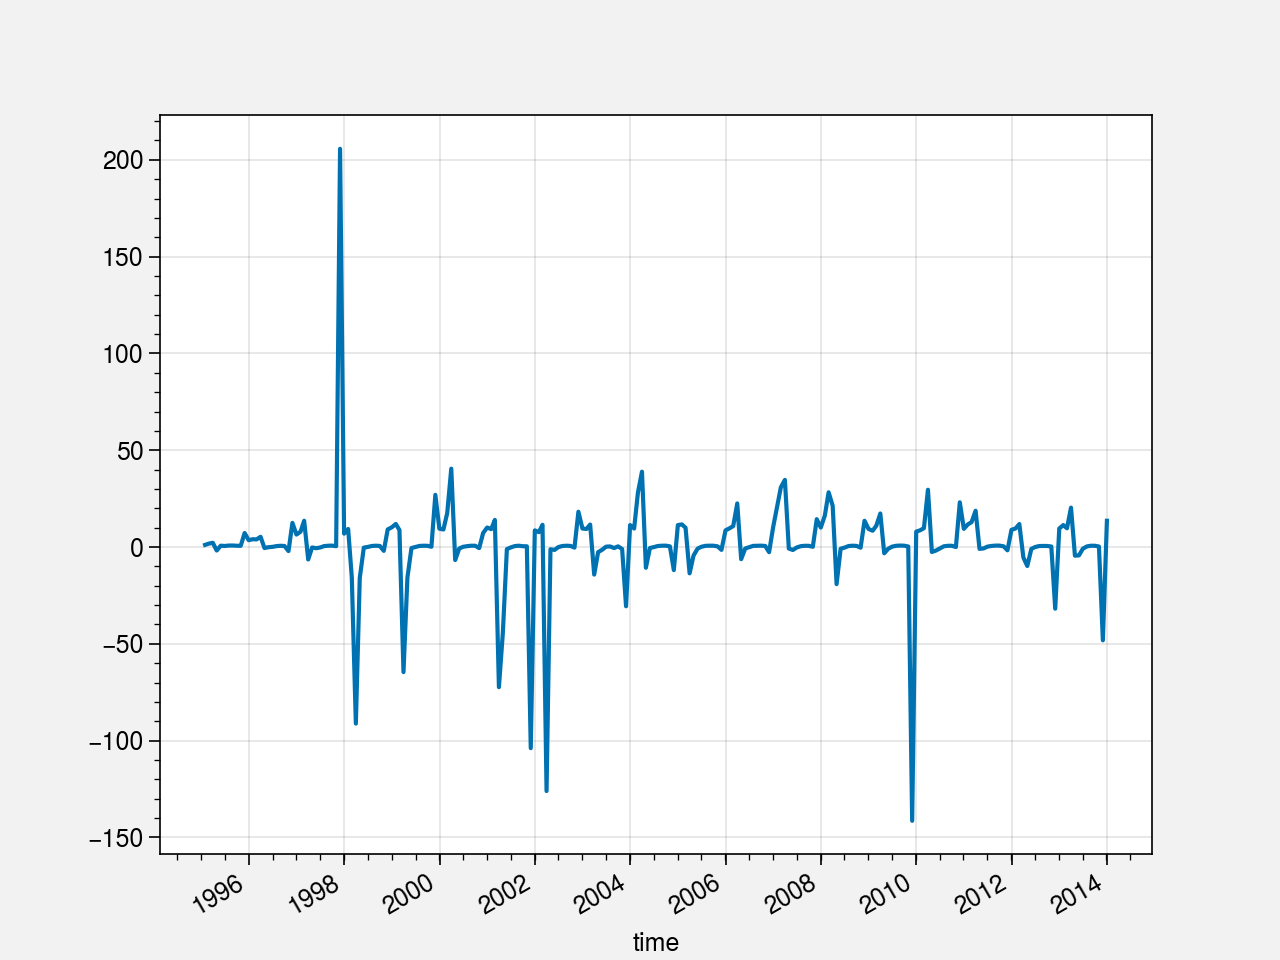

In [12]:
(nep/npp).plot()